### Introduction to RandomForest and XGBoost Model 
- **Random Forest**: - Model uses bagging method (improve on variance of the model) to overcome overfitting in the model 
- **XGBoost Method**: - Model uses boosting method (improve on bias of the model, adjusting accuracy) to overcome underfitting.

In [3]:
#Importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Data Collection (Pre-defined in the model)
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing()

In [5]:
#Split independent (Explainatory features) and target feature
X = df.data

Y = df.target

In [6]:
#Model independent features Pre-processing (Standard Scaler)
from sklearn.preprocessing import StandardScaler

standard = StandardScaler(copy= False)
standard_x = standard.fit_transform(X)

In [7]:
#Model Selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(standard_x, Y, test_size= 0.2, random_state= 42)

In [8]:
#Model Development (Using XGBoost and Random Forest Algorithm)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

n_estimator = 100
xgb = XGBRegressor(n_estimators= n_estimator, random_state= 42)
rf = RandomForestRegressor(n_estimators= n_estimator, random_state= 42)

In [9]:
#Model Training and calculation of it's training time 
import time

#Random Forest algorithm 
rf_start_time = time.time()
rf.fit(x_train, y_train)
rf_end_time = time.time()

#Total time taken 
rf_total_training = rf_end_time - rf_start_time

#XG Boost algorithm 
xgb_start_time = time.time()
xgb.fit(x_train, y_train)
xgb_end_time = time.time()

#Total time taken 
xgb_total_training = xgb_end_time - xgb_start_time


In [10]:
#Model Prediction and time taken to make prediction 

#Random Forest algorithm 
rf_start_time = time.time()
rf_predict = rf.predict(x_test)
rf_end_time = time.time()

#Total time taken 
rf_total_predict = rf_end_time - rf_start_time

#XG Boost algorithm 
xgb_start_time = time.time()
xgb_predict = xgb.predict(x_test)
xgb_end_time = time.time()

#Total time taken 
xgb_total_predict = xgb_end_time - xgb_start_time

In [11]:
#Model Training and Prediction time

print(f"Random Forest Training Time: {rf_total_training:.4f}")
print(f"Random Forest Testing Time: {rf_total_predict:.4f}") 

print(f"XGBoost Training Time: {xgb_total_training:.4f}")
print(f"XGBoost Testing Time: {xgb_total_predict:.4f}")

Random Forest Training Time: 14.2944
Random Forest Testing Time: 0.1235
XGBoost Training Time: 0.6333
XGBoost Testing Time: 0.0039


In [12]:
#Model Evaluations using accuracy_score and R2 statistical method 
from sklearn.metrics import mean_squared_error, r2_score

#Random Forest 
rf_mse = mean_squared_error(y_test, rf_predict)
rf_r2_score = r2_score(y_test, rf_predict)


#XGboost 
xgb_mse= mean_squared_error(y_test, xgb_predict)
xgb_r2_score = r2_score(y_test, xgb_predict)

In [13]:
#Model Evaluations 
print(f"Random Forest Accuracy Score: {rf_mse:.4f}")
print(f"Random Forest R2 Score: {rf_r2_score:.4f}") 

print(f"XGBoost Accuracy Score: {xgb_mse:.4f}")
print(f"XGBoost R2 Score: {xgb_r2_score:.4f}")

Random Forest Accuracy Score: 0.2555
Random Forest R2 Score: 0.8050
XGBoost Accuracy Score: 0.2226
XGBoost R2 Score: 0.8301


In [20]:
#Deviation of the Model 
std_y = np.std(y_test)

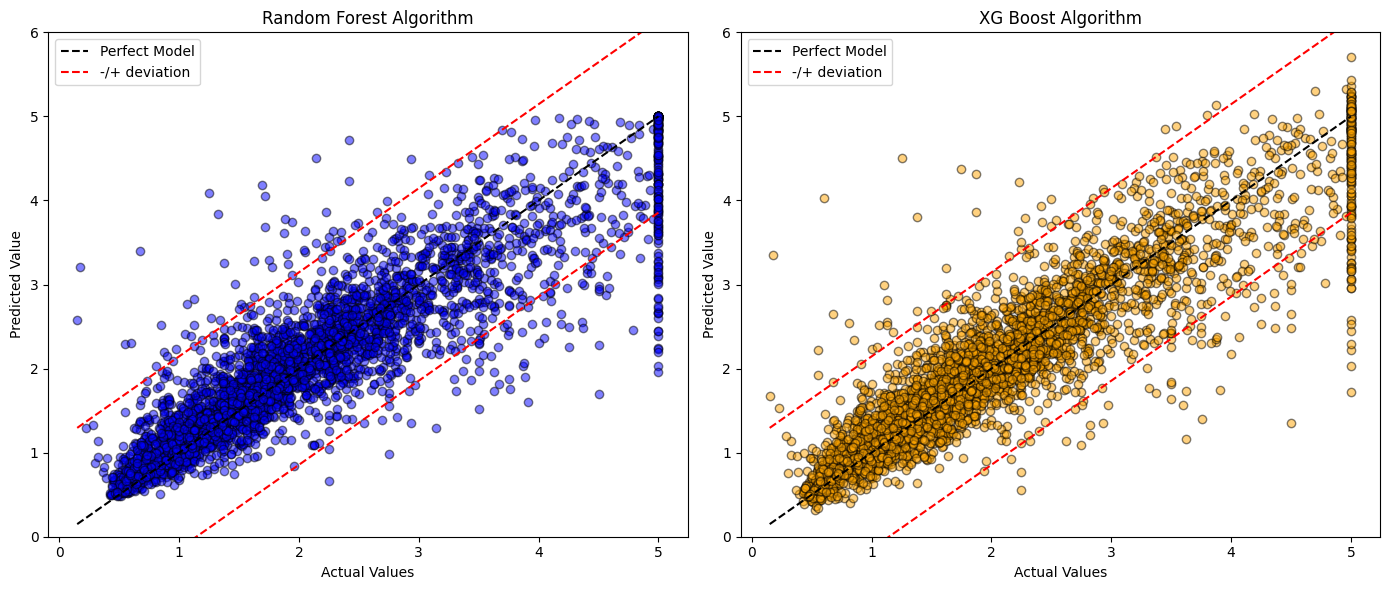

In [34]:
#Model Visualization (Random Forest and XGBoost)
#Random Forest Visualization
plt.figure(figsize= (14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predict, alpha= 0.5, color= 'blue', ec= 'k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label= 'Perfect Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', label= '-/+ deviation')
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--')
plt.ylim(0, 6)
plt.title('Random Forest Algorithm')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value')
plt.legend()


#XG Boost Algorithm 
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predict, alpha= 0.5, color= 'orange', ec= 'k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label= 'Perfect Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', label= '-/+ deviation')
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--')
plt.ylim(0, 6)
plt.title("XG Boost Algorithm")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value')
plt.legend()

plt.tight_layout()
plt.show()

### TODO: - 
1. Model Visualization
2. How well the model evaluations are compared to rest of supervised learning models ?